___
# Ciência dos Dados - PROJETO 1

### Victor Arruda Niubó e Bruno Morales Balkins

    

## Perfil das mulheres como chefes de família:

___
## Introdução


Nesse projeto iremos analisar o perfil de mulheres no papel de chefes de família e comparar com homens no mesmo papel, para isso escolhemos as seguintes variáveis do banco de dados:
    - V0302: Sexo.
    - V8005: Idade.
    - V0402: Condição na familia
    - V4704: Condição de atividade na semana de referência para pessoas de 10 anos ou mais de idade.
    - V4805: Condição de ocupação na semana de referência para pessoas de 10 anos ou mais de idade.
    - V4706: Posição na ocupação no trabalho principal da semana de referência para pessoas de 10 anos ou mais de 
    idade.

## Pergunta:
### Quais as diferenças entre homens e mulheres chefes de família?

___
## Filtros da base de dados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
dados = pd.read_csv('PES2015.csv',sep=',')

In [3]:
#Filtro de dados:

dados_filtrados = dados.loc[(dados.V0302)|(dados.V8005)|(dados.V0402)|(dados.V4704)|(dados.V4805)|(dados.V4706), \
          ['V0302','V8005','V0402','V4704','V4805','V4706']]

#Mudando nomes das colunas:

dados_filtrados.rename(columns={'V0302':'Sexo','V8005':'Idade','V0402':'Condicao_familia',\
                                'V4704':'Atividade_na_semana','V4805':'Ocupação_na_semana',\
                                'V4706':'Posicao_no_Trabalho'}, inplace=True)


In [4]:
df2 = dados_filtrados.dropna(subset = ['Atividade_na_semana','Ocupação_na_semana','Posicao_no_Trabalho'])

In [5]:
df2 = df2[(df2['Condicao_familia'])== 1]
df2 = df2[(df2['Atividade_na_semana'])== 1]
df2 = df2[(df2['Ocupação_na_semana'])== 1]
df2 = df2[(df2['Posicao_no_Trabalho'])!= 13]

In [6]:
df2.Sexo = df2.Sexo.astype('category')
df2.Idade = df2.Idade.astype('float')
df2['Condicao_familia'] = df2['Condicao_familia'].astype('category')
df2['Atividade_na_semana'] = df2['Atividade_na_semana'].astype('category')
df2['Ocupação_na_semana'] = df2['Ocupação_na_semana'].astype('category')
df2['Posicao_no_Trabalho'] = df2['Posicao_no_Trabalho'].astype('category')

In [7]:
df2.Sexo.cat.categories = (['M','F'])
df2['Condicao_familia'].cat.categories = (['Pessoa de referência'])
df2['Atividade_na_semana'].cat.categories = (['Economicamente ativa'])
df2['Ocupação_na_semana'].cat.categories = (['Ocupada'])
df2['Posicao_no_Trabalho'].cat.categories = (['Empregado com carteira de trabalho assinada','Militar',\
                                              'Funcionário público estatutário',\
                                              'Outro empregado sem carteira de trabalho assinada',\
                                              'Trabalhador doméstico com carteira de trabalho assinada',\
                                             'Trabalhador doméstico sem carteira  de trabalho assinada',\
                                             'Conta própria','Empregador','Trabalhador na produção para o próprio consumo',\
                                             'Trabalhador na construção para o próprio uso'])




In [8]:
pd.crosstab(index=[df2.Sexo], columns=[df2.Posicao_no_Trabalho])

Posicao_no_Trabalho,Empregado com carteira de trabalho assinada,Militar,Funcionário público estatutário,Outro empregado sem carteira de trabalho assinada,Trabalhador doméstico com carteira de trabalho assinada,Trabalhador doméstico sem carteira de trabalho assinada,Conta própria,Empregador,Trabalhador na produção para o próprio consumo,Trabalhador na construção para o próprio uso
Sexo,,,,,,,,,,
M,21021,281,3596,7308,315,315,17772,3290,1577,96
F,8031,21,3065,2686,1345,3226,5594,662,875,10


In [9]:
ut1 = df2.Sexo.value_counts(sort=False)
print(ut1,'\n')

M    55571
F    25515
Name: Sexo, dtype: int64 



In [10]:
ut3 = df2.Posicao_no_Trabalho.value_counts(sort=False)
print(ut3,'\n')

Empregado com carteira de trabalho assinada                 29052
Militar                                                       302
Funcionário público estatutário                              6661
Outro empregado sem carteira de trabalho assinada            9994
Trabalhador doméstico com carteira de trabalho assinada      1660
Trabalhador doméstico sem carteira  de trabalho assinada     3541
Conta própria                                               23366
Empregador                                                   3952
Trabalhador na produção para o próprio consumo               2452
Trabalhador na construção para o próprio uso                  106
Name: Posicao_no_Trabalho, dtype: int64 



In [11]:

ut1 = (df2.Sexo.value_counts(sort=False, normalize=True)*100).round(decimals=1)
print(ut1,'\n')

ut3 = (df2.Posicao_no_Trabalho.value_counts(sort=True, normalize=True)*100).round(decimals=1)
print(ut3,'\n')


M    68.5
F    31.5
Name: Sexo, dtype: float64 

Empregado com carteira de trabalho assinada                 35.8
Conta própria                                               28.8
Outro empregado sem carteira de trabalho assinada           12.3
Funcionário público estatutário                              8.2
Empregador                                                   4.9
Trabalhador doméstico sem carteira  de trabalho assinada     4.4
Trabalhador na produção para o próprio consumo               3.0
Trabalhador doméstico com carteira de trabalho assinada      2.0
Militar                                                      0.4
Trabalhador na construção para o próprio uso                 0.1
Name: Posicao_no_Trabalho, dtype: float64 



___
## Análise e Resultados

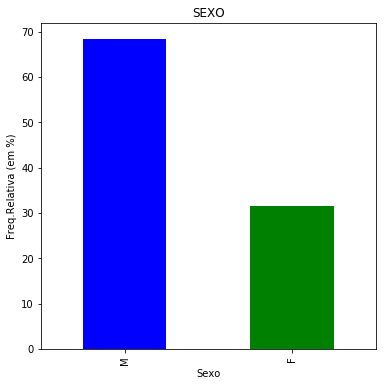

In [12]:
plot = ut1.plot(kind='bar',title='SEXO',figsize=(6, 6),color=('b','g'))
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Sexo')
plt.show()

#### Percebe-se por esse gráfico que a proporção de homens e mulheres como pessoas de referência em suas casas é de aproximadamente 70% e 30%. O que mostra uma desigualdade significativa no papel de lider do lar.

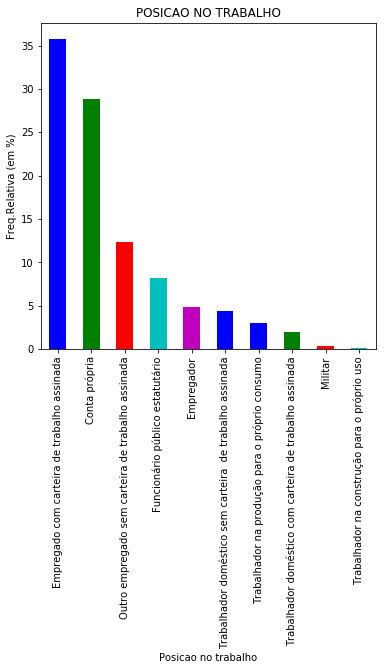

In [13]:
plot = ut3.plot(kind='bar',title='POSICAO NO TRABALHO',figsize=(6, 6),color=('b','g','r','c','m'))
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Posicao no trabalho')
plt.show()

#### Aqui percebemos que empregados com carteira assinada dominam os números de chefes de família, o que é compreensível uma vez que a maioria dos trabalhadores pertencem a essa categoria, porém o fato de trabalhadores por conta própria ocupar o segundo lugar nos deixou intrigados, pois na nossa concepção existe um número muito menor de trabalhadores autonomos do que empregados, tanto com quanto sem carteira assinada.

In [14]:
ct=pd.crosstab(df2.Posicao_no_Trabalho, df2.Sexo, margins=True, rownames=['POSICAO NO TRABALHO'], colnames=['SEXO'])
ct

SEXO,M,F,All
POSICAO NO TRABALHO,,,
Empregado com carteira de trabalho assinada,21021,8031,29052
Militar,281,21,302
Funcionário público estatutário,3596,3065,6661
Outro empregado sem carteira de trabalho assinada,7308,2686,9994
Trabalhador doméstico com carteira de trabalho assinada,315,1345,1660
Trabalhador doméstico sem carteira de trabalho assinada,315,3226,3541
Conta própria,17772,5594,23366
Empregador,3290,662,3952
Trabalhador na produção para o próprio consumo,1577,875,2452


#### Essa tabela nos mostra a obvia predominância masculina em todas as linhas de trabalho EXETO em trabalhos domésticos, tanto com quanto sem carteira de trabalho assinada. Isso ilustra a sociedade preconceituosa e segregacionista em que vivemos. (Porém esse não é o espaço para cr´ticas sociais não é mesmo).

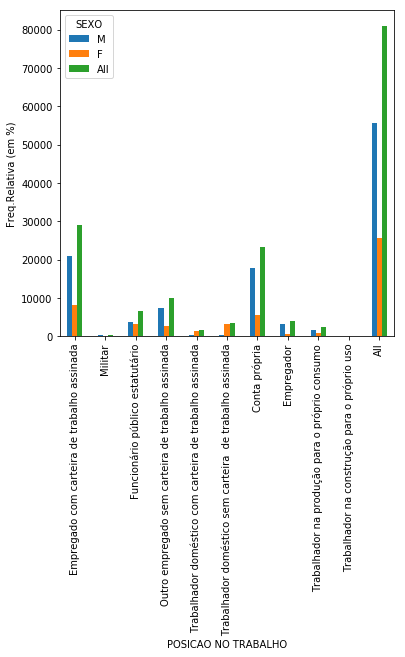

In [16]:
plot = ct.plot(kind='bar',figsize=(6, 6))
plt.ylabel('Freq.Relativa (em %)')
plt.show()

#### Gráfico que ilustra com maior clareza a tabela anterior.

___
## Conclusão 

#### Concluimos então, com base em toda analise feita, que o fato de não serem muito frequentes mulheres chefes de família se deve ao fato de que é muito menor porcentagem relativa de mulheres empregadas em relação aos homen, e mesmo as que estão empregadas tem uma média salarial menor devido a séculos de repressão e ao fato de que existe o preconceito que é trazido do berço de que a mulher deve ter como único objetivo na vida criar e cuidar de seus filhos, uma vez que vemos que aproximadamente 61% das mulheres não estão inseridas no mercado de trabalho, já no caso dos homens esse número sobe para 84% e muitas dessas mulheres que não trabalham dedicam suas vidas a cuidar de seus filhos, um dado interessante que encontramos em uma pesquisa (link abaixo) diz que 23% das mulheres deixam seus empregos para cuidar dos filhos.  

Fonte:  https://noticias.portaldaindustria.com.br/noticias/trabalho/23-das-mulheres-deixam-o-emprego-para-cuidar-de-filhos/